# Salary Project 

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set()

## Data Loading & Exploring 

In [3]:
df=pd.read_csv(r'C:\Users\aldawlia\Desktop\Salary_Data_Based_country_and_race.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           6704 non-null   int64  
 1   Age                  6702 non-null   float64
 2   Gender               6702 non-null   object 
 3   Education Level      6701 non-null   object 
 4   Job Title            6702 non-null   object 
 5   Years of Experience  6701 non-null   float64
 6   Salary               6699 non-null   float64
 7   Country              6704 non-null   object 
 8   Race                 6704 non-null   object 
dtypes: float64(3), int64(1), object(5)
memory usage: 471.5+ KB


In [ ]:
### there are 9 columns and 6704 rows , there are some very few missing data and one column is actually index 

In [5]:
(df['Unnamed: 0'].value_counts()>1).sum()

0

In [ ]:
### we will drop it 

In [6]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [7]:
df.duplicated().sum()

1535

In [8]:
df[df.duplicated(subset=None,keep=False)].sort_values(['Salary','Race'])

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
4923,21.0,Female,High School,Junior Sales Representative,0.0,25000.0,USA,African American
5083,21.0,Female,High School,Junior Sales Representative,0.0,25000.0,USA,African American
5701,24.0,Female,High School,Receptionist,0.0,25000.0,USA,African American
5933,24.0,Female,High School,Receptionist,0.0,25000.0,USA,African American
4411,31.0,Female,High School,Junior Sales Associate,1.0,25000.0,Canada,Asian
...,...,...,...,...,...,...,...,...
4197,50.0,Male,PhD,Data Scientist,23.0,225000.0,Australia,Australian
4212,50.0,Male,PhD,Data Scientist,23.0,225000.0,Australia,White
4242,50.0,Male,PhD,Data Scientist,23.0,225000.0,Australia,White
4276,51.0,Male,PhD,Data Scientist,24.0,240000.0,Canada,Black


In [9]:
df.drop_duplicates(inplace=True)

In [66]:
##we now have only 5169

In [10]:
## there are 7 predictor variables and one target , we will explore each
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,UK,White
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,USA,Hispanic
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Canada,White
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,USA,Hispanic
4,52.0,Male,Master's,Director,20.0,200000.0,USA,Asian
...,...,...,...,...,...,...,...,...
6698,37.0,Male,Bachelor's Degree,Junior Sales Representative,6.0,75000.0,Canada,Asian
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0,UK,Mixed
6700,32.0,Male,High School,Sales Associate,3.0,50000.0,Australia,Australian
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0,China,Chinese


## Exploring Age

In [69]:
df.Age.describe()

count    5167.000000
mean       34.006774
std         7.780958
min        21.000000
25%        28.000000
50%        32.000000
75%        39.000000
max        62.000000
Name: Age, dtype: float64

In [72]:
## age ranges from 21(around graduatuation) to 62(around retirement) ,
##mean is slighly higher than median indicating slighly right skewed distribution

In [73]:
import plotly.express as px 

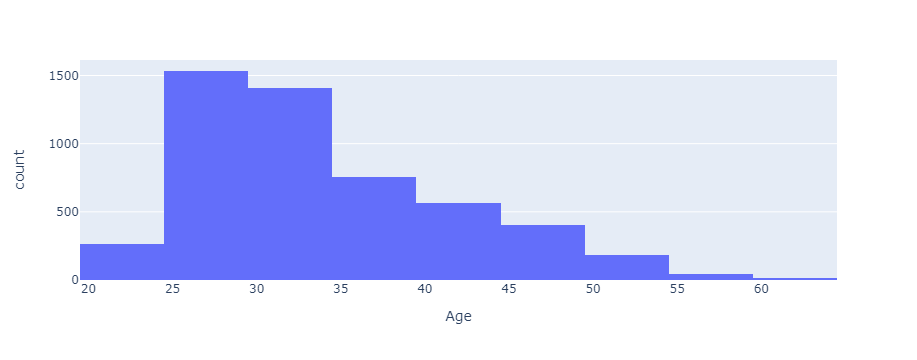

In [98]:
px.histogram(df,'Age',nbins=12)

correlation coeff is: 0.7428422947127118


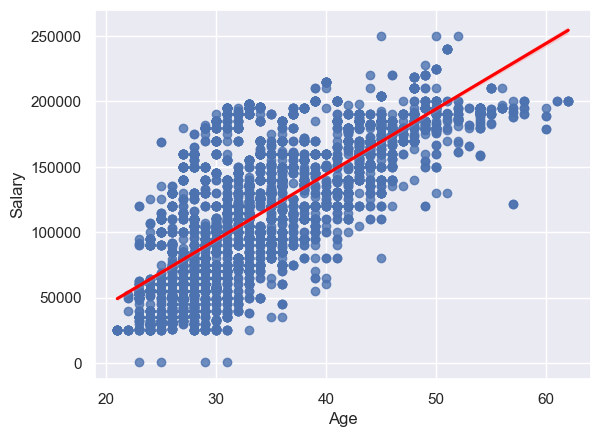

In [162]:
sns.regplot(data=df,x='Age',y='Salary',line_kws={'color':'red'})
## threre is a strong positive correlation between age and salary 
print('correlation coeff is:',df.corr(numeric_only=True)['Salary']['Age'])

In [ ]:
## most ppl in dataset are from 25 to 35 

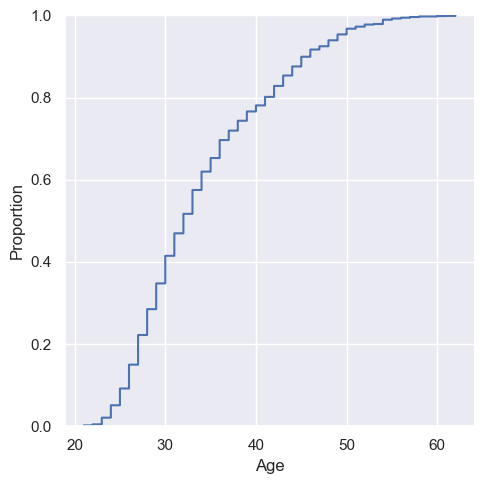

In [93]:
sns.displot(data=df,x='Age',kind='ecdf',height=5,weights=True)

In [84]:
df.Age.skew()
## age is slighly skewed to the right meaning more ppl are below 34 

0.8510319712121485

In [103]:
df.Gender.value_counts(normalize=True).mul(100)

Male      54.402942
Female    45.345462
Other      0.251597
Name: Gender, dtype: float64

In [ ]:
## about 45 percent are males where 45 percent are females and some less one percent are not specified 

In [121]:
df['Education Level'].value_counts()

Bachelor's Degree    1692
Master's Degree      1263
PhD                  1076
Bachelor's            566
High School           347
Master's              221
phD                     1
Name: Education Level, dtype: int64

In [17]:
df['Education Level']=df['Education Level'].replace({'phD':'PhD',"Bachelor's Degree":"Bachelor's","Master's Degree":"Master's"})

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,UK,White
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,USA,Hispanic
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Canada,White
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,USA,Hispanic
4,52.0,Male,Master's,Director,20.0,200000.0,USA,Asian
...,...,...,...,...,...,...,...,...
6698,37.0,Male,Bachelor's,Junior Sales Representative,6.0,75000.0,Canada,Asian
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0,UK,Mixed
6700,32.0,Male,High School,Sales Associate,3.0,50000.0,Australia,Australian
6701,30.0,Female,Bachelor's,Financial Manager,4.0,55000.0,China,Chinese


<Axes: xlabel='count', ylabel='Education Level'>

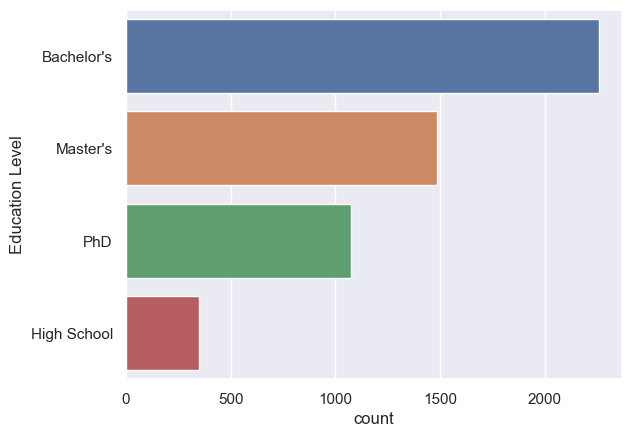

In [18]:
sns.countplot(df,y='Education Level')
## most are bachelos degree while very few with only high school

In [20]:
df['education']=df['Education Level'].map({"Bachelor's":1,"High School":0,"PhD":3,"Master's":2})

In [22]:
df.corr()['Salary']['education']

C:\Users\aldawlia\AppData\Local\Temp\ipykernel_13208\1877556509.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Salary']['education']


0.6413211321870873

<Axes: xlabel='education', ylabel='Salary'>

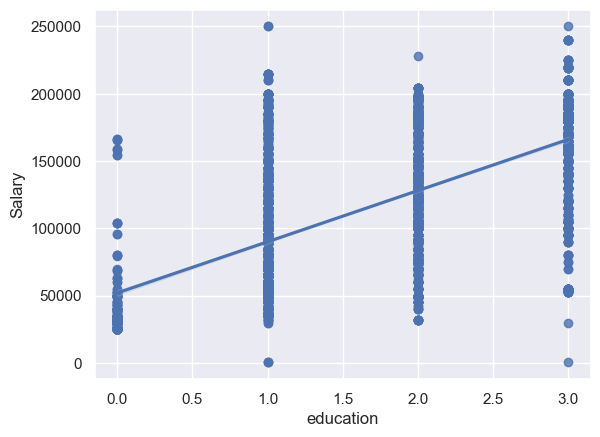

In [25]:
sns.regplot(data=df,x='education',y='Salary')

In [131]:
df.columns

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary', 'Country', 'Race'],
      dtype='object')

In [141]:
df['Job Title'].value_counts()
## there are 193 different job titles 

Software Engineer                331
Data Scientist                   326
Software Engineer Manager        313
Full Stack Engineer              264
Senior Project Engineer          257
                                ... 
Account Manager                    1
Help Desk Analyst                  1
Business Intelligence Analyst      1
VP of Finance                      1
Supply Chain Analyst               1
Name: Job Title, Length: 193, dtype: int64

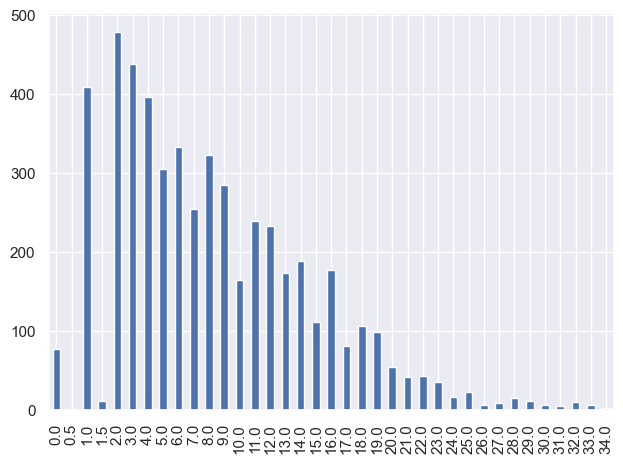

In [147]:
df['Years of Experience'].value_counts().sort_index().plot(kind='bar')
plt.tight_layout()

<Axes: xlabel='Years of Experience', ylabel='Density'>

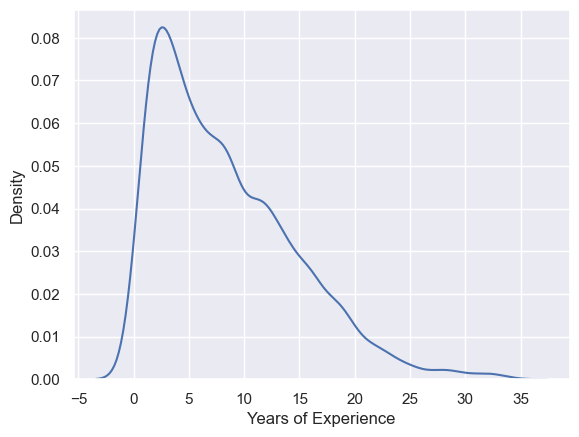

In [148]:
sns.kdeplot(df['Years of Experience'])
## right skewed with respect to years of experience 

<Axes: xlabel='Years of Experience', ylabel='Salary'>

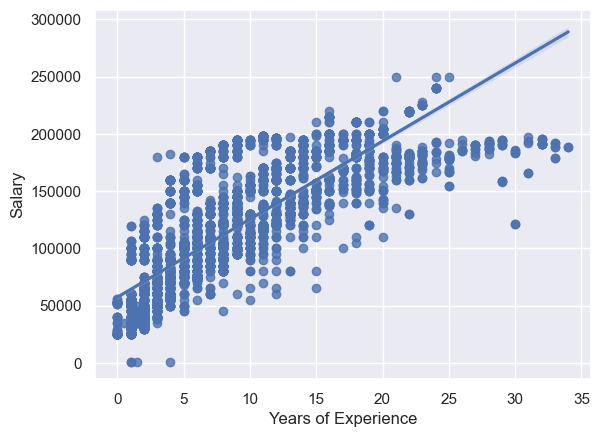

In [27]:
sns.regplot(data=df,x='Years of Experience',y='Salary')

In [28]:
df.corr(numeric_only=True)['Salary']['Years of Experience']

0.8143075538302771

In [29]:
df.columns

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary', 'Country', 'Race', 'education'],
      dtype='object')

In [33]:
df.Country.value_counts()

USA          1080
UK           1061
Australia    1023
China        1014
Canada        991
Name: Country, dtype: int64

<Axes: xlabel='Salary', ylabel='Country'>

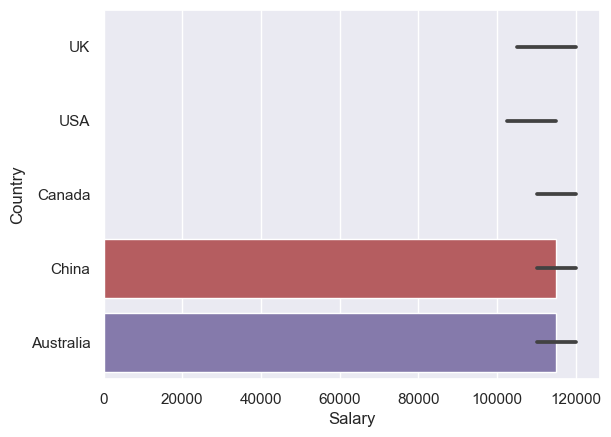

In [39]:
sns.barplot(data=df,y='Country',x='Salary',estimator=np.median)

<Axes: xlabel='Salary', ylabel='Race'>

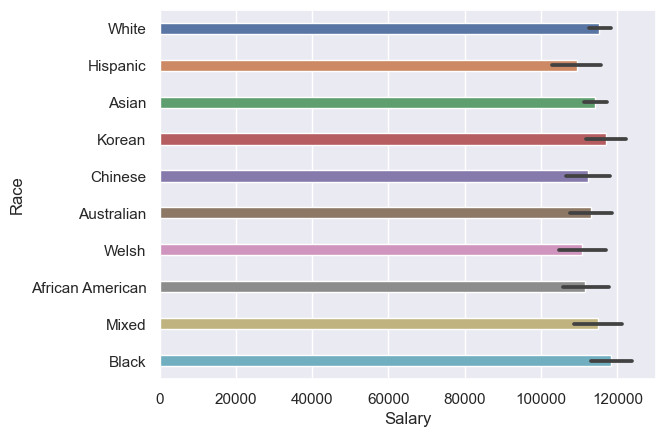

In [47]:
sns.barplot(data=df,y='Race',x='Salary',width=.3)

In [51]:
import plotly.express as px 

<Axes: xlabel='Gender', ylabel='Salary'>

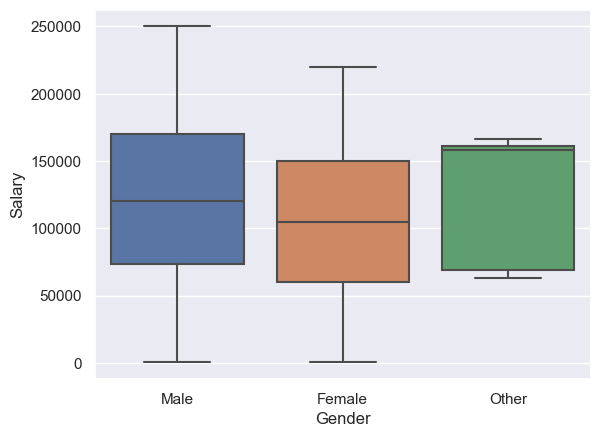

In [55]:
sns.boxplot(x=df.Gender,y=df.Salary)

In [49]:
df.Gender.value_counts()

Male      2811
Female    2343
Other       13
Name: Gender, dtype: int64

In [69]:
df['Job Title'].str.lower().str.split(" ").str.get(1).value_counts()

manager       657
engineer      649
end           413
scientist     385
analyst       351
             ... 
technology      1
advisor         1
graphic         1
content         1
relations       1
Name: Job Title, Length: 61, dtype: int64

In [56]:
def categorize_job_title(job_title):
 job_title = str(job_title).lower()
 if 'software' in job_title or 'developer' in job_title:
 return 'Software/Developer'
 elif 'data' in job_title or 'analyst' in job_title or 'scientist' in job_tit
 return 'Data Analyst/Scientist'
 elif 'manager' in job_title or 'director' in job_title or 'vp' in job_title:
 return 'Manager/Director/VP'
 elif 'sales' in job_title or 'representative' in job_title:
 return 'Sales'
 elif 'marketing' in job_title or 'social media' in job_title:
 return 'Marketing/Social Media'
 elif 'product' in job_title or 'designer' in job_title:
 return 'Product/Designer'
 elif 'hr' in job_title or 'human resources' in job_title:
 return 'HR/Human Resources'
 elif 'financial' in job_title or 'accountant' in job_title:
 return 'Financial/Accountant'
 elif 'project manager' in job_title:
 return 'Project Manager'
 elif 'it' in job_title or 'support' in job_title:
 return 'IT/Technical Support'
 elif 'operations' in job_title or 'supply chain' in job_title:
 return 'Operations/Supply Chain'
 elif 'customer service' in job_title or 'receptionist' in job_title:
 return 'Customer Service/Receptionist'
 else:
 return 'Other'
df['Job Title'] = df['Job Title'].apply(categorize_job_title)


Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary', 'Country', 'Race', 'education'],
      dtype='object')

<Axes: xlabel='Age', ylabel='Count'>

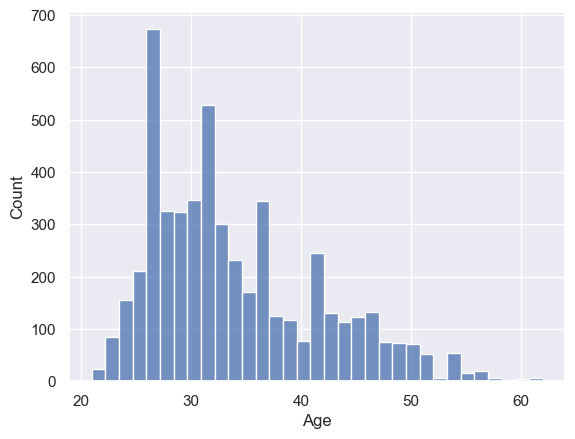

In [103]:
sns.histplot(df['Age'])
